570 Final Proejct

Rong Huang 6857552986

Patrick Peng 9802946913

Eva Tang 8441615104


# **How does the Covid-19 affect the Unemployment Rate in USA?**

## 1.**Introduction**

In this project, we foucs on the impact of Covid-19 on the U.S. unemployment rate. 

According to KIMBERLY AMADEO in her "Unemployment, Impact and Trends", the unemployment rate in macro terms is an indicator that reflects the health of the economy; investors can also choose whether to sell stocks in their hands based on the unemployment rate of the sector. On a micro level, for individuals, the unemployment rate tells how much competition one would have if one were unemployed, or how much negotiating room one would have for a new position. So the unemployment rate is closely related to our lives.

The sudden arrival of Covid-19 has affected almost all countries around the world to various degrees. Everyone's lifestyles, government regulations, and country-to-country connections have changed dramatically. Most importantly, the economy of the country was also greatly affected. In addition, people's jobs are inextricably linked to the country's economic situation. Therefore, the impact of Covid-19 on unemployment has become the subject of our attention.

Anzhelika Antipova conducted a reconciliation study of the impact of Covid-19 on unemployment in "Analysis of the COVID-19 impacts on employment and unemployment across the multi-dimensional social disadvantaged areas". By collecting data and visualizing it, she found that covid-19 has a significant impact on unemployment, and regions that were already economically disadvantaged before the outbreak were more affected by covid-19(Antipova, 2021)。

Ayşegül Şahin, Murat Tasci, and Jin Yan in the paper "The Unemployment Cost of COVID-19: How High and How Long?" also discussed the impact of Covid-19 on unemployment. In their projections, Covid-19 would peak at 20% or less and have a temporary impact on GDP, but if Covid-19 continues to worsen and cause business failures and market disruptions, the results will be different from their predictions. (Şahin et al., 2020)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# part for loading data from google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
#part for adjusting data
from pandas import DataFrame
import datetime
from pandas.plotting import register_matplotlib_converters
# part for OLS model
import statsmodels.api as sm
from scipy import stats
import math
# part for normalize data
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn import preprocessing
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from math import sqrt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **2. Data**

### **2.1 Data Source**
We collect the covid-19 dataset from Kaggle. This dataset includes the daily covid-19 cases and death from Jan. 20, 2020 to Apr. 29, 2022. (US Counties COVID 19 Dataset, n.d.). This data set records the number of new diagnoses and deaths per day since the outbreak in the United States.

Also, we have the monthly unemployment Rate, monthly Civilian Labor Force Level data, and monthly Labor Participation rate collected from FRED Economic Data ( FRED | St. Louis Fed, n.d.). All three sets of data are recorded by month starting from January 1, 1948 to March 1, 2020. 

According to FRED, “ The unemployment rate represents the number of unemployed as a percentage of the labor force. Labor force data are restricted to people 16 years of age and older, who currently reside in 1 of the 50 states or the District of Columbia, who do not reside in institutions” (Unemployment Rate (UNRATE) | FRED | St. Louis Fed, n.d.)  

### **2.2 Loading Data From Google Drive**




In [ ]:
# process to load data from google drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Unemployment rate
#https://drive.google.com/file/d/1WoTSX1M61rSflZk6_ivBY7ucjvG22upv/view?usp=sharing
fileDownloaded_0 = drive.CreateFile({'id':'1WoTSX1M61rSflZk6_ivBY7ucjvG22upv'})

#Labor Force Level
#https://drive.google.com/file/d/1UHnbDfAFFkegdp-2Dcv8rGMDpoisTGTB/view?usp=sharing
fileDownloaded_1 = drive.CreateFile({'id':'1UHnbDfAFFkegdp-2Dcv8rGMDpoisTGTB'})

#Daily United States Covid Data from Jan.20,2020 to Apr.29,2022
#https://drive.google.com/file/d/168dtGqiT1-LnN_3mMpFsEawflnSrp-ZK/view?usp=sharing
fileDownloaded_2 = drive.CreateFile({'id':'168dtGqiT1-LnN_3mMpFsEawflnSrp-ZK'})

#Labor Participate Rate
#https://drive.google.com/file/d/1FwSEcbtU73h1jasGUxqhmeUjyq4W5MDO/view?usp=sharing
fileDownloaded_3 = drive.CreateFile({'id':'1FwSEcbtU73h1jasGUxqhmeUjyq4W5MDO'})

#Dummy Set (unemployment rate , labor level, covid(0/1))
#https://drive.google.com/file/d/1Dt1X7Z1dVZAUuPH4okPtMTf9Yxcou15z/view?usp=sharing
fileDownloaded_4 = drive.CreateFile({'id':'1Dt1X7Z1dVZAUuPH4okPtMTf9Yxcou15z'})

#Montly United States Covid Data from Jan.20,2020 to Apr.29,2022
#https://drive.google.com/file/d/1a6BmQiV_2Dr2QDMjwNMX5Tim2DAyQiEj/view?usp=sharing
fileDownloaded_5 = drive.CreateFile({'id':'1a6BmQiV_2Dr2QDMjwNMX5Tim2DAyQiEj'})


In [ ]:
# to get the data
fileDownloaded_0.GetContentFile('UnemploymentRate.csv')
fileDownloaded_1.GetContentFile('LaborLevel.csv')
fileDownloaded_2.GetContentFile('Covid.csv')
fileDownloaded_3.GetContentFile('LaborParticipate.csv')
fileDownloaded_4.GetContentFile('DummySet.csv')
fileDownloaded_5.GetContentFile('covid_month.csv')


### **2.3 Data Testing**




In order to make the frequency of the data consistent, we converted the daily data of Covid-19 into monthly data.

Also, as the U.S. Covid-19 data are only available from early 2020, we restricted the time range for all other data from February 1, 2020, to March 1, 2022 to make all of our data in model 1 and 2 have the same time range.

In Model 3, since we intend to use all data from January 1948 to the present, we extend the Covid-19 data and set Covid-19 to Dummy Variable. We set the Covid data to "0" for all dates before February 1, 2020, and from February 1, 2020 to March 2020. We set the Covid data to '0' for all dates until February 1, 2020, and '1' for the period from February 1, 2020 to March 1, 2020.


We plot the data and adjust the data to make them fit each other. 

To the use OLS model, for all the data we tested whether it is normally distributed or not. And we used code to make the data distribution more normal for those data that are not normally distributed.

#### Unemployment Rate Data

---


#####  Plot data and adjust data





,DATE,Unemployment Rate
865,2020-02-01,3.5
866,2020-03-01,4.4
867,2020-04-01,14.7
868,2020-05-01,13.2
869,2020-06-01,11.0
870,2020-07-01,10.2
871,2020-08-01,8.4
872,2020-09-01,7.9
873,2020-10-01,6.9
874,2020-11-01,6.7


<Figure size 432x288 with 0 Axes>

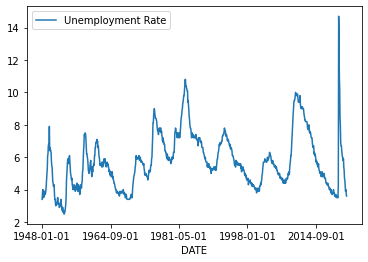

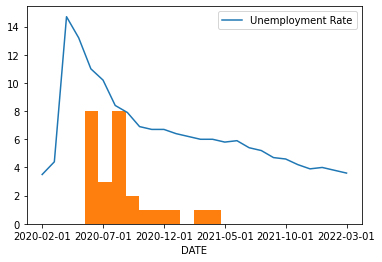

In [ ]:
# Unemployment Rate Data (month)
un_rate = pd.read_csv('UnemploymentRate.csv')
plt.figure()
un_rate.plot(0,1)
#obtain data from 2020/02/01 to 2022/03/01
ur_uncheck = un_rate[865:]
ur_uncheck.plot(0,1)
#for unemployment rate data
ur_data = ur_uncheck['Unemployment Rate']
plt.hist(ur_data)
ur_uncheck

##### Summary statistics

In [ ]:
ur_uncheck.describe()

,Unemployment Rate
count,26.000000
mean,6.511538
std,2.901631
min,3.500000
25%,4.450000
50%,5.950000
75%,6.850000
max,14.700000


##### Normalizing data

In [ ]:
# Check normal distribution of orginal data
shapiro_test = stats.shapiro(ur_data)
print('original:')
print(shapiro_test)
# logging the data 
logur = np.log(ur_data)
log_shapiro_test = stats.shapiro(logur)
print('log:')
print(log_shapiro_test)
#differencing the data 
diffur = np.diff(ur_data)
diff_shapiro_test = stats.shapiro(diffur)
print('diff:')
print(diff_shapiro_test)
# normalizing by code
group_ur = ur_uncheck.groupby('DATE').sum()
group_ur.index = pd.to_datetime(group_ur.index)
nur = preprocessing.normalize(group_ur, axis=0)
scaled = pd.DataFrame(nur)
n_shapiro_test = stats.shapiro(scaled)
print("normalize code:")
print(n_shapiro_test)

original:
(0.8389639854431152, 0.0008755525923334062)
log:
(0.941556990146637, 0.1463162899017334)
diff:
(0.4477319121360779, 1.1854249137854822e-08)
normalize code:
(0.8389638066291809, 0.0008755461894907057)


In [ ]:
ur_loglist = list(logur)
ur_uncheck['logur'] = list(logur)
ur = ur_uncheck

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


We use logged unemployment data. The logged unemployment data is normal distribution.

Highest w value: 0.94156

p value: 0.1463>0.05


#### Labor Force Level Data

---



##### Plot data and adjust data


,DATE,Labor Level
865,2020-02-01,164583
866,2020-03-01,162764
867,2020-04-01,156358
868,2020-05-01,158122
869,2020-06-01,159834
870,2020-07-01,160015
871,2020-08-01,160707
872,2020-09-01,160153
873,2020-10-01,160834
874,2020-11-01,160539


<Figure size 432x288 with 0 Axes>

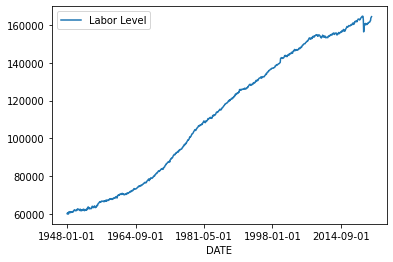

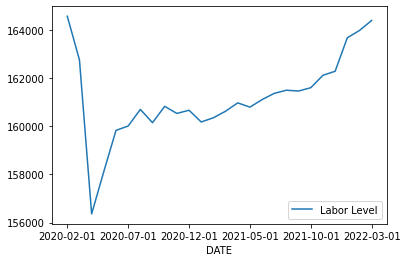

In [ ]:
#Labor Force Level
labor_force_level= pd.read_csv('LaborLevel.csv')
plt.figure()
labor_force_level.plot(0,1)
#obtain data from 2020/02/01 to 2022/03/01
lfl_uncheck = labor_force_level[865:]
lfl_uncheck.plot(0,1)
#for labor force level data
lfl_data = lfl_uncheck['Labor Level']
lfl_uncheck

(array([1., 0., 1., 0., 5., 8., 4., 3., 1., 3.]),
 array([156358. , 157180.5, 158003. , 158825.5, 159648. , 160470.5,
        161293. , 162115.5, 162938. , 163760.5, 164583. ]),
 <a list of 10 Patch objects>)

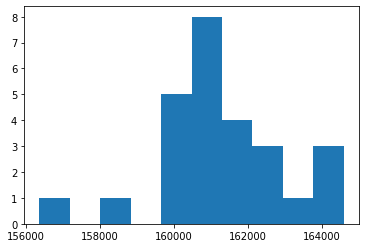

In [ ]:
plt.hist(lfl_data)

##### Summary statistics

In [ ]:
lfl_uncheck.describe()

,Labor Level
count,26.000000
mean,161196.730769
std,1802.674958
min,156358.000000
25%,160404.000000
50%,160906.000000
75%,161997.000000
max,164583.000000


##### Normalizing data

In [ ]:
# Check normal distribution of orginal data
shapiro_test = stats.shapiro(lfl_data)
print('original:')
print(shapiro_test)
# logging the data 
loglfl = np.log(lfl_data)
log_shapiro_test = stats.shapiro(loglfl)
print('log:')
print(log_shapiro_test)
#differencing the data 
difflfl = np.diff(lfl_data)
diff_shapiro_test = stats.shapiro(difflfl)
print('diff:')
print(diff_shapiro_test)
# normalizing by code
group_lfl = lfl_uncheck.groupby('DATE').sum()
group_lfl.index = pd.to_datetime(group_lfl.index)
nlfl = preprocessing.normalize(group_lfl, axis=0)
scaled = pd.DataFrame(nlfl)
n_shapiro_test = stats.shapiro(scaled)
print("normalize code:")
print(n_shapiro_test)

original:
(0.9342377185821533, 0.097803495824337)
log:
(0.933098554611206, 0.0918637290596962)
diff:
(0.6231579184532166, 7.886824846536911e-07)
normalize code:
(0.9342381358146667, 0.0978056937456131)


In [ ]:
lfl = lfl_uncheck

The orignal data is normal distribution.

Highest w value: 0.934>0.9

Highest p value: 0.0978>0.05

#### Covid Data

---

##### Plot data and adjust data

,cases
date,
2020-01-31,41
2020-02-29,736
2020-03-31,1095533
2020-04-30,19611708
2020-05-31,45452114
2020-06-30,65288844
2020-07-31,111626136
2020-08-31,166758528
2020-09-30,199758786


<Figure size 432x288 with 0 Axes>

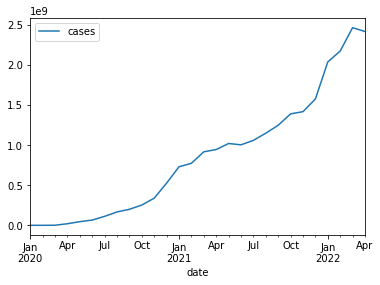

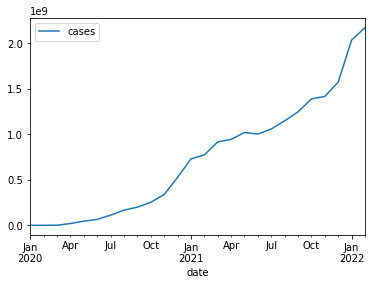

In [ ]:
#Covid Daily Data
covid_daily_data = pd.read_csv('Covid.csv')
covid_daily_clear = covid_daily_data.drop(columns = ["fips", "state", "county","deaths"])
covid_daily = covid_daily_clear.groupby('date').sum()
#Convert daily data to monthly data
covid_daily.index = pd.to_datetime(covid_daily.index)
covid_monthly = covid_daily.resample('M').sum()
plt.figure()
covid_monthly.plot()
# As the covid data collect at the end of the month, we adjust data to fit other data
covid_uncheck = covid_monthly[:26]
covid_uncheck.plot()
#for covid data
covid_data = covid_uncheck['cases']
covid_uncheck

(array([9., 2., 1., 2., 5., 2., 2., 1., 0., 2.]),
 array([4.10000000e+01, 2.17372621e+08, 4.34745200e+08, 6.52117780e+08,
        8.69490360e+08, 1.08686294e+09, 1.30423552e+09, 1.52160810e+09,
        1.73898068e+09, 1.95635326e+09, 2.17372584e+09]),
 <a list of 10 Patch objects>)

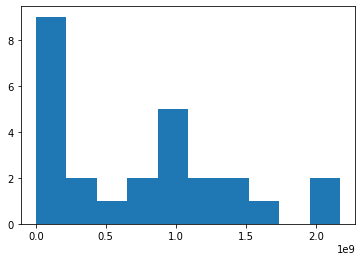

In [ ]:
plt.hist(covid_data)

##### Summary statistics

In [ ]:
covid_uncheck.describe()

,cases
count,2.600000e+01
mean,7.372235e+08
std,6.519594e+08
min,4.100000e+01
25%,1.254092e+08
50%,7.518009e+08
75%,1.126569e+09
max,2.173726e+09


##### Normalizing data

In [ ]:
# Check normal distribution of orginal data
shapiro_test = stats.shapiro(covid_data)
print('original:')
print(shapiro_test)
# logging the data 
logcovid = np.log(covid_data)
log_shapiro_test = stats.shapiro(logcovid)
print('log:')
print(log_shapiro_test)
#differencing the data 
diffcovid = np.diff(covid_data)
diff_shapiro_test = stats.shapiro(diffcovid)
print('diff:')
print(diff_shapiro_test)
# normalizing by code
ncovid = preprocessing.normalize(covid_uncheck, axis=0)
scaled = pd.DataFrame(ncovid)
n_shapiro_test = stats.shapiro(scaled)
print("normalize code:")
print(n_shapiro_test)


original:
(0.9100008010864258, 0.026363622397184372)
log:
(0.6142403483390808, 4.3331164079063456e-07)
diff:
(0.76456618309021, 6.162462523207068e-05)
normalize code:
(0.9100006222724915, 0.02636341005563736)


In [ ]:
covid = covid_uncheck

The orignal data perform best among all the methods.

Highest w value: 0.91>0.9

Highest p value: 0.02

#### Labor Participate Rate Data

---


#####  Plot data and adjust data





,DATE,Labor Participate
865,2020-02-01,63.4
866,2020-03-01,62.7
867,2020-04-01,60.2
868,2020-05-01,60.8
869,2020-06-01,61.4
870,2020-07-01,61.5
871,2020-08-01,61.7
872,2020-09-01,61.4
873,2020-10-01,61.6
874,2020-11-01,61.5


<Figure size 432x288 with 0 Axes>

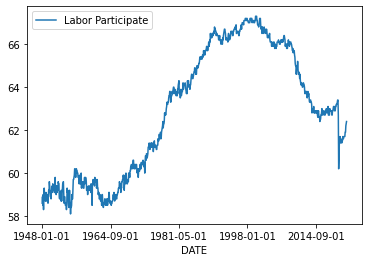

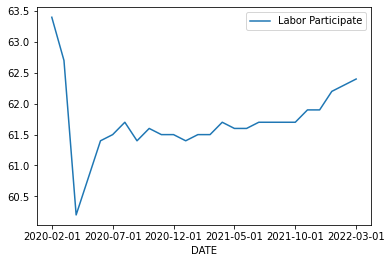

In [ ]:
#Labor participate
labor_participate= pd.read_csv('LaborParticipate.csv')
plt.figure()
labor_participate.plot(0,1)
#obtain data from 2020/02/01 to 2022/03/01
lpr_uncheck = labor_participate[865:]
lpr_uncheck.plot(0,1)
#for labor force level data
lpr_data = lpr_uncheck['Labor Participate']
lpr_uncheck

(array([1., 0., 1., 0., 5., 8., 4., 3., 1., 3.]),
 array([156358. , 157180.5, 158003. , 158825.5, 159648. , 160470.5,
        161293. , 162115.5, 162938. , 163760.5, 164583. ]),
 <a list of 10 Patch objects>)

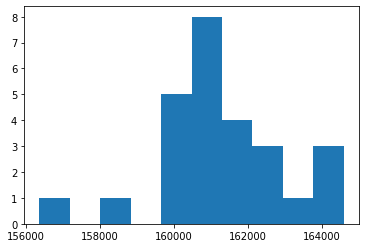

In [ ]:
plt.hist(lfl_data)

#####Summary statistics

In [ ]:
lpr_uncheck.describe()

,Labor Participate
count,26.000000
mean,61.711538
std,0.587419
min,60.200000
25%,61.500000
50%,61.650000
75%,61.850000
max,63.400000


##### Normalizing data

In [ ]:
# Check normal distribution of orginal data
shapiro_test = stats.shapiro(lpr_data)
print('original:')
print(shapiro_test)
# logging the data 
loglpr = np.log(lpr_data)
log_shapiro_test = stats.shapiro(loglpr)
print('log:')
print(log_shapiro_test)
#differencing the data 
difflpr = np.diff(lpr_data)
diff_shapiro_test = stats.shapiro(difflpr)
print('diff:')
print(diff_shapiro_test)
# normalizing by code
group_lpr = lpr_uncheck.groupby('DATE').sum()
group_lpr.index = pd.to_datetime(group_lpr.index)
nlpr = preprocessing.normalize(group_lpr, axis=0)
scaled = pd.DataFrame(nlpr)
n_shapiro_test = stats.shapiro(scaled)
print("normalize code:")
print(n_shapiro_test)

original:
(0.879936158657074, 0.005738910287618637)
log:
(0.8809369206428528, 0.0060254367999732494)
diff:
(0.588778018951416, 3.184936474553979e-07)
normalize code:
(0.8799363970756531, 0.005738988518714905)


In [ ]:
lpr_loglist = list(loglpr)
lpr_uncheck['loglpr'] = list(loglpr)
lpr = lpr_uncheck 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


The logged data perform best. We would use logged data

Highest w value: 0.8809

Highest p value: 0.006

#### Dummy Data

---

##### Describe data 


In [ ]:
dum = pd.read_csv('DummySet.csv')
dum


,DATE,Unemployment Rate,Labor Level,Covid
0,1/1/1948,3.4,60095,0
1,2/1/1948,3.8,60524,0
2,3/1/1948,4.0,60070,0
3,4/1/1948,3.9,60677,0
4,5/1/1948,3.5,59972,0
...,...,...,...,...
886,11/1/2021,4.2,162126,1
887,12/1/2021,3.9,162294,1
888,1/1/2022,4.0,163687,1
889,2/1/2022,3.8,163991,1


##### Summary statistics

In [ ]:
dum.describe()

,Unemployment Rate,Labor Level,Covid
count,891.000000,891.000000,891.000000
mean,5.754321,112322.845118,0.030303
std,1.698198,34964.705743,0.171516
min,2.500000,59972.000000,0.000000
25%,4.500000,75891.000000,0.000000
50%,5.600000,114876.000000,0.000000
75%,6.800000,146619.500000,0.000000
max,14.700000,164633.000000,1.000000


note: As the Covid data here is intended to be set as a dummy variable, so the summary statistics of Covid are meaningless.

### **2.4 Meraging Data**

After adjusting the data, as the labor force level and labor participate rate are not independent from each other, we decide to use labor force level because it has a better normal distribution.

Before we used the OLS model, we merged the required data together to facilitate better operation of the code.

In [ ]:
data = lfl.merge(ur,on='DATE')
print(data)


          DATE  Labor Level  Unemployment Rate     logur
0   2020-02-01       164583                3.5  1.252763
1   2020-03-01       162764                4.4  1.481605
2   2020-04-01       156358               14.7  2.687847
3   2020-05-01       158122               13.2  2.580217
4   2020-06-01       159834               11.0  2.397895
5   2020-07-01       160015               10.2  2.322388
6   2020-08-01       160707                8.4  2.128232
7   2020-09-01       160153                7.9  2.066863
8   2020-10-01       160834                6.9  1.931521
9   2020-11-01       160539                6.7  1.902108
10  2020-12-01       160671                6.7  1.902108
11  2021-01-01       160184                6.4  1.856298
12  2021-02-01       160359                6.2  1.824549
13  2021-03-01       160631                6.0  1.791759
14  2021-04-01       160978                6.0  1.791759
15  2021-05-01       160801                5.8  1.757858
16  2021-06-01       161114    

In [ ]:
# we export the covid monthly case data and import again to merage them
COVID = pd.read_csv('covid_month.csv')
CovidData = COVID[:26]
CovidData = CovidData[['cases']]
data = pd.concat([data,CovidData], axis=1)
print(data)

          DATE  Labor Level  Unemployment Rate     logur       cases
0   2020-02-01       164583                3.5  1.252763          41
1   2020-03-01       162764                4.4  1.481605         736
2   2020-04-01       156358               14.7  2.687847     1095533
3   2020-05-01       158122               13.2  2.580217    19611708
4   2020-06-01       159834               11.0  2.397895    45452114
5   2020-07-01       160015               10.2  2.322388    65288844
6   2020-08-01       160707                8.4  2.128232   111626136
7   2020-09-01       160153                7.9  2.066863   166758528
8   2020-10-01       160834                6.9  1.931521   199758786
9   2020-11-01       160539                6.7  1.902108   252794114
10  2020-12-01       160671                6.7  1.902108   338932078
11  2021-01-01       160184                6.4  1.856298   525970605
12  2021-02-01       160359                6.2  1.824549   729984096
13  2021-03-01       160631       

## **3. Modeling**


Because we want to explore the effect of Covid-19 on the unemployment rate in the United States, we choose to use OLS to estimate the effect between them.

We designed three sets of models to observe the effect of Covid-19 on the unemployment rate.


1. *Model 1* (without Covid-19 data):  
Unemployment Rate = $\beta_{0}$ + $\beta_{1}$ x Labor Force Level

We chose to only use the Labor force level and to not include the Covid-19 data first. We choose to use the Labor force level because this index is directly related to the unemployment rate, so we believe that the labor force level will allow our model to better fit our data. We originally planned to add labor participation rate as well, but we felt that labor participation rate would interact with labor force level and eventually lead to confounding, so we decided to remove one of them. Because the labor force level has a better normal distribution, we chose to keep it.


2. *Model 2*(with Covid-19 data):  
Unemployment Rate = $\beta_{0}$ + $\beta_{1}$ x Labor Force Level + $\beta_{2}$ x Covid Cases

We chose to build model 2 by adding Covid-19 data on top of model 1. This model could show how the Covid-19 cases effect the unemployment rate.



3. *Model 3*(with Covid-19 data as Dummy Variable):
Unemployment Rate = $\beta_{0}$ + $\beta_{1}$ x Labor Force Level + $\beta_{2}$ x Covid (Dummy)

Since the time of Covid-19 is too small compared to the time when unemployment is recorded, the sample size of the data used in our first two models is also small. Therefore, in order to compare the unemployment rate without Covid with the unemployment rate with Covid to show the effect of Covid on unemployment, we set Covid to Dummy Variable and increase the time range of the data to 1948-2022.





### **Model 1**
  Unemployment Rate = $\beta_{0}$ + $\beta_{1}$ x Labor Force Level

In [ ]:
X = lfl_data
Y = logur

In [ ]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:      Unemployment Rate   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              498.7
Date:                Fri, 06 May 2022   Prob (F-statistic):                    4.94e-18
Time:                        22:28:00   Log-Likelihood:                         -13.127
No. Observations:                  26   AIC:                                      28.25
Df Residuals:                      25   BIC:                                      29.51
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

##### Interpreting

The regression output of labor level is statistically significant because their p-values equal 0.000 which is lower than the usual significance level of 0.05. Therefore, we reject the null hypothesis and there is a relationship between the variables.

The R-squared here is 0.952, which means 95.2% variation in unemployment rate is explained by the labor level. Which indicates our model fits the data well.

 The coefficient here is 1.111e-0.5 (0.00001111), which means when the labor level  increase 1 unit, the unemployment rate will increases about 0.00001111 %.


### **Model 2**
  Unemployment Rate = $\beta_{0}$ + $\beta_{1}$ x Labor Force Level + $\beta_{2}$ x Covid Cases


In [ ]:
X = data[['cases','Labor Level']]
Y = ur_loglist

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              467.9
Date:                Fri, 06 May 2022   Prob (F-statistic):                    5.98e-20
Time:                        21:37:37   Log-Likelihood:                         -4.7218
No. Observations:                  26   AIC:                                      13.44
Df Residuals:                      24   BIC:                                      15.96
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

##### Interpreting

The regression output of Covid Case is statistically significant because their p-values equal 0.000 which is lower than the usual significance level of 0.05. Therefore, there is a relationship between the variables.

The R-squared here is 0.975, which means 97.5% variation in unemployment rate is explained by the Covid Case. This is bigger than the R-squared of Model 1. This indicates that with the addition of the Covid-19 data, our model fits the U.S. unemployment rate more closely.

The coefficient of Labor level is 1.311e-05(0.00001311), which means the unemployment rate will increase about 0.00001311%, when the Labor level increases by one.

The coefficient of Covid-19 cases is -4.36e-10(-0.000000000436), which means the unemployment rate will decrease about 0.000000000436%, when the Covid-19 case increases by one.

But, based on the reality, the coefficient of Covid-19 cases does not make sense at all;Increasing Covid-19 cases does not make our unemployment rate lower. Moreover, the condition number is 9.31e+03 which is very lagre and may indicate there are strong multicollinearity or other numerical problems in our model. Therefore, even though we normalized our data, there is something wrong.


### **Model 3**
  Unemployment Rate = $\beta_{0}$ + $\beta_{1}$ x Labor Force Level + $\beta_{2}$ x Covid (Dummy)

In [ ]:
X = dum[['Labor Level','Covid']]
Y = dum['Unemployment Rate']
import statsmodels.api as sm
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:      Unemployment Rate   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                              3210.
Date:                Fri, 06 May 2022   Prob (F-statistic):                        0.00
Time:                        21:37:37   Log-Likelihood:                         -1922.0
No. Observations:                 891   AIC:                                      3848.
Df Residuals:                     889   BIC:                                      3858.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

##### Interpreting

The regression output of Covid Case is statistically significant because their p-values equal 0.001 which is lower than the usual significance level of 0.05.

The R-squared here is 0.878, which means 87.8% variation in unemployment rate is explained by the Covid Case.This is smaller than the R-squared of the two previous models. But because we stretched the time range of the data to the maximum, which may have neglected some other variable factors; so we think that the R-squared of Model 3 is still acceptable.

The coefficient of Labor level is 4.825e-05(0.00004825),which means when Labor level increase 1 unit, the unemployment will increase about 0.00004825%

The coefficient of Covid is -1.3830, which means when compare to the umemployment rate without Covid, the unemployment rate with Covid will decrese about 1.383%.

However, based on the reality, Covid-19 does not make our unemployment rate lower. Moreover the condition number is 6.96e+05 which is still very lagre and may indicate there are strong multicollinearity or other numerical problems in our model. So there is something wrong.

## **4.Findings**


1. By testing three sets of models, we find that the model with Covid-19 cases data (Model 2) will fit the U.S. unemployment rate data better than the model without Covid-19 casese data (Model 1). This is also reflected in our model 3. Although the R-squared of model 3 is less than the previous two models, which might be caused by having much larger time span and the possible omission of many potential variable factors, the R-squared of model 3 is still 0.878; so it is obvious that Covid-19 has an effect on the unemployment rate.

2. We also find that in the models with Covid-19 data (models 2 and 3), they both have large condition numbers, which indicates that there are strong multicollinearity or other numerical problems. In other words, our variables are not independent from each other and the Covid-19 data may also have an effect on the labor force level. Moreover, the coefficients of Covid-19 from these two models are also contrary to reality. Our model results show that Covid-19 is inversely proportional to the unemployment rate; in other words, the presence of Covid-19 reduces the unemployment rate, but this is clearly contrary to reality.


## **5.Conclusion**

In our research, we believe that the increasing Covid-19 cases would make the unemployment rate higher. However, in our model, we find out that the Covid-19 has negative effects on the unemployment rate. This unexpected bad result might be caused by our limitation of our data and model. To eliminate the problem that may be caused by small sample size,we normalized our data which improves the accuracy and integrity of our data. The result of multicollinearity in our OLS regression model means that our labor force level data and the Covid-19 cases data would affect each other, and they are not independent variables. We think that the Covid-19 cases play the role of confounder in our models because the covid deaths would decrease the labor force level. Then, we try to obtain other data like age, sex, and education level which are independent variables from each other. Nevertheless, due to hard to count the large base of age, sex, and education level, we could only find the data collected in years that are hard to fit in our covid-19 cases data and unemployment rate data. As the result of failing to eliminate the side effect of confounder in our model, the estimation result for the relation between unemployment rate and Covid-19 cases is contrary to the reality.


Depending on our findings in other economics literature, we conclude that the Covid-19 cases positively affect the unemployment rate from many aspects like number of labor force, labor participation rate, and number of job offers. During the Covid-19 pandemic, people were restricted from traveling , which reduced the mobility of the population, resulting in local job requirements. Many people lose job opportunities due to the traveling restrictions. As the Covid-19 emerged rapidly and uncontrollably, many people died in this disaster causing the labor force level to decrease. Also, the Covid-19 has caused many companies to be unable to operate normally and may eventually shut down. The difficulty of the companies would decrease the job offers. Thus, people would be more likely to lose theirs than before. Moreover, many state governments provide more social benefits during the pandemic like Covid-19 Unemployment Insurance which would make people’s unemployed period longer. 

Future Improvement:



1. It is necessary to collect more data in terms of days. For example, data on age, sex ratio, education level.


2. Consider and include more data on the details of Covid in future models. For example, Covid mortality rates, recovery rates, and vaccination rates. Also consider the impact of government policies on unemployment during the epidemic.


3. Continue to explore and use data that is not affected by Covid but can affect the U.S. unemployment rate.


## **6.Reference**

References

1.Antipova, A. (2021). Analysis of the COVID-19 impacts on employment and unemployment across the multi-dimensional social disadvantaged areas. Social Sciences & Humanities Open, 4(1). https://doi.org/10.1016/j.ssaho.2021.100224


2.Civilian Labor Force Level (CLF16OV) | FRED | St. Louis Fed. (n.d.). FRED. Retrieved May 3, 2022, from https://fred.stlouisfed.org/series/CLF16OV


3.Labor Force Participation Rate (CIVPART) | FRED | St. Louis Fed. (2022, April 1). FRED. Retrieved May 3, 2022, from https://fred.stlouisfed.org/series/CIVPART


4.Şahin, A., Tasci, M., & Yan, J. (2020, July 5). The Unemployment Cost of COVID-19: How High and How Long? Federal Reserve Bank of Cleveland. Retrieved May 3, 2022, from https://www.clevelandfed.org/en/newsroom-and-events/publications/economic-commentary/2020-economic-commentaries/ec-202009-unemployment-costs-of-covid.aspx?source=content_type%3Areact%7Cfirst_level_url%3Aarticle%7Csection%3Amain_content%7Cbutton%3Abody_link


5.Unemployment Rate (UNRATE) | FRED | St. Louis Fed. (n.d.). FRED. Retrieved May 3, 2022, from https://fred.stlouisfed.org/series/UNRATE


6.US counties COVID 19 dataset. (n.d.). Kaggle. Retrieved May 3, 2022, from https://www.kaggle.com/datasets/fireballbyedimyrnmom/us-counties-covid-19-dataset